# Porftolio Optimization Mix

## Import Libraries

In [153]:
#!pip install seaborn
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

In [154]:
df_stocks = pd.read_csv('df_stocks.csv')

In [155]:
df_stocks['Date'] =  pd.to_datetime(df_stocks['Date'], format='%Y-%m-%d')

In [156]:
df_stocks.set_index('Date', inplace=True)

In [157]:
df_crypto = pd.read_csv('crypto_20_test.csv')

In [158]:
top_10_crypto = df_crypto.drop(['MONA', 'DGB', 'SC', 'BTS', 'BCN', 'MAID', 'DASH', 'FCT', 'NXT', 'DCR'], axis = 1)

In [159]:
top_10_crypto['Date'] =  pd.to_datetime(top_10_crypto['time'], format='%Y-%m-%d')

In [160]:
top_10_crypto.set_index('Date', inplace=True)

In [161]:
top_10_crypto = top_10_crypto[(top_10_crypto.index >= '2016-01-04')]

In [162]:
df_merge = pd.merge(df_stocks, top_10_crypto, left_index=True, right_index=True)

In [163]:
df_merge = df_merge.drop('time', axis = 1)

In [164]:
log_return = np.log(df_merge/df_merge.shift(1))

In [165]:
log_return.mean() * len(log_return)

AAPL      0.523156
AMZN      0.940320
BRK-B     0.449746
FB        0.296316
GOOGL     0.321136
JNJ       0.450630
JPM       0.558699
MFST     -5.069510
V         0.618164
XOM       0.115155
BTC       2.068886
XRP       4.087711
ETH       4.596651
DOGE      2.667289
LTC       1.971642
BTB       0.876071
BITCNY   -0.240671
XMR       4.610131
BLOCK     3.824733
XWC       5.321347
dtype: float64

In [166]:
log_return.cov() * len(log_return)

AAPL      AMZN     BRK-B        FB     GOOGL       JNJ       JPM  \
AAPL    0.157577  0.098288  0.044186  0.077893  0.083310  0.022041  0.053578   
AMZN    0.098288  0.237049  0.044388  0.134299  0.120075  0.023518  0.050378   
BRK-B   0.044186  0.044388  0.080943  0.039469  0.047438  0.033039  0.075796   
FB      0.077893  0.134299  0.039469  0.239894  0.112057  0.022414  0.047562   
GOOGL   0.083310  0.120075  0.047438  0.112057  0.136429  0.030277  0.051408   
JNJ     0.022041  0.023518  0.033039  0.022414  0.030277  0.063994  0.031424   
JPM     0.053578  0.050378  0.075796  0.047562  0.051408  0.031424  0.130612   
MFST    0.064358  0.205788  0.044359  0.060860  0.066607  0.032365 -0.009052   
V       0.073588  0.088237  0.050392  0.081439  0.083357  0.029518  0.058176   
XOM     0.034352  0.035314  0.044649  0.033746  0.034959  0.027821  0.049467   
BTC     0.036734  0.025979  0.022613  0.012804  0.031630  0.022664  0.026681   
XRP     0.072080  0.020267  0.046145 -0.009150  0.051669  0.035647  0.046175   
ETH     0.050080  0.090928  0.026722  0.045060  0.065926  0.027266  0.005984   
DOGE    0.120444  0.239320  0.121040  0.135459  0.118046  0.014155  0.191415   
LTC     0.075389  0.050393  0.032302  0.007717  0.046897  0.010189  0.056834   
BTB     0.073675  0.041943 -0.004563  0.164041  0.022895 -0.011009 -0.051107   
BITCNY -0.016637 -0.024900 -0.005507 -0.112460  0.018056 -0.158557 -0.260121   
XMR     0.048507  0.048070  0.047635  0.001895  0.027191 -0.005897  0.060104   
BLOCK   0.105854  0.163438  0.033399  0.170157  0.087268  0.054992 -0.002078   
XWC     0.065634  0.111027  0.066985  0.034342  0.102392  0.026592  0.099884   

             MFST         V       XOM       BTC       XRP       ETH  \
AAPL     0.064358  0.073588  0.034352  0.036734  0.072080  0.050080   
AMZN     0.205788  0.088237  0.035314  0.025979  0.020267  0.090928   
BRK-B    0.044359  0.050392  0.044649  0.022613  0.046145  0.026722   
FB       0.060860  0.081439  0.033746  0.012804 -0.009150  0.045060   
GOOGL    0.066607  0.083357  0.034959  0.031630  0.051669  0.065926   
JNJ      0.032365  0.029518  0.027821  0.022664  0.035647  0.027266   
JPM     -0.009052  0.058176  0.049467  0.026681  0.046175  0.005984   
MFST    15.660875  0.092150  0.026038  0.266365  0.454792  0.420945   
V        0.092150  0.117713  0.034346  0.016823  0.048870  0.028754   
XOM      0.026038  0.034346  0.089823  0.011986  0.054853  0.020412   
BTC      0.266365  0.016823  0.011986  1.666907  1.037410  1.241367   
XRP      0.454792  0.048870  0.054853  1.037410  6.347009  1.460655   
ETH      0.420945  0.028754  0.020412  1.241367  1.460655  4.885938   
DOGE     0.038610  0.068108  0.100793  1.447173  1.874529  1.272952   
LTC      0.488847  0.036049  0.020488  1.364602  1.818174  1.710344   
BTB      0.952605 -0.064477  0.077618  1.547646  0.993103  2.195462   
BITCNY   2.792975  0.023409 -0.113297  0.010107  0.246467 -0.126599   
XMR     -0.066585  0.040045  0.017932  1.431719  2.013747  2.269422   
BLOCK    0.326482  0.053854  0.092918  1.640226  1.899276  1.527583   
XWC      0.101183  0.065296  0.066337  1.645169  1.686049  2.387093   

             DOGE       LTC        BTB      BITCNY       XMR      BLOCK  \
AAPL     0.120444  0.075389   0.073675   -0.016637  0.048507   0.105854   
AMZN     0.239320  0.050393   0.041943   -0.024900  0.048070   0.163438   
BRK-B    0.121040  0.032302  -0.004563   -0.005507  0.047635   0.033399   
FB       0.135459  0.007717   0.164041   -0.112460  0.001895   0.170157   
GOOGL    0.118046  0.046897   0.022895    0.018056  0.027191   0.087268   
JNJ      0.014155  0.010189  -0.011009   -0.158557 -0.005897   0.054992   
JPM      0.191415  0.056834  -0.051107   -0.260121  0.060104  -0.002078   
MFST     0.038610  0.488847   0.952605    2.792975 -0.066585   0.326482   
V        0.068108  0.036049  -0.064477    0.023409  0.040045   0.053854   
XOM      0.100793  0.020488   0.077618   -0.113297  0.017932   0.092918   
BTC      1.447

In [167]:
np.random.seed(101)
num_of_ite = 50000
all_weights = np.zeros((num_of_ite,len(log_return.columns)))
port_return = np.zeros(num_of_ite)
port_vol = np.zeros(num_of_ite)
sharpe_ratio = np.zeros(num_of_ite)

for i in range(num_of_ite):
    weights = np.array(np.random.random(20))
    weights = weights / np.sum(weights)
    all_weights[i,:] = weights
    port_return[i] = np.sum((log_return.mean() * weights) *len(log_return))
    port_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sharpe_ratio[i] = port_return[i]/port_vol[i]

### Distribution of Simulated Portfolios

Below we show the various portfolio profiles from the Monte Carlo simulation with their Expected Return, Expected Volatility and accompanying Sharpe Ratios.

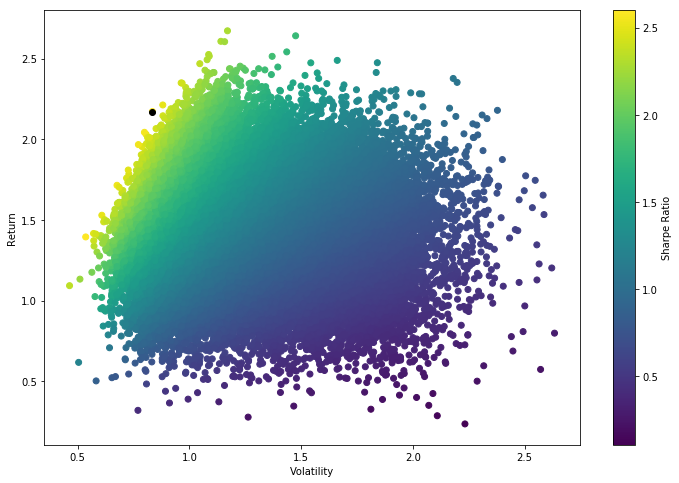

In [168]:
max_port_return = port_return[sharpe_ratio.argmax()]
max_port_vol = port_vol[sharpe_ratio.argmax()]


plt.figure(figsize=(12,8))
plt.scatter(x=port_vol,y=port_return,c=sharpe_ratio)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(x=max_port_vol,y=max_port_return,c='black')

## Mathematical Optimization for Asset Allocation

In [169]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * len(log_return)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * len(log_return), weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

### Maximum Sharpe Ratio

In [170]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [171]:
def check_sum(weights):
    return np.sum(weights) - 1

In [172]:
cons = ({'type':'eq','fun': check_sum})
noa = len(log_return.columns)
bounds = tuple((0, 1) for x in range(noa))
init_guess = noa * [1. / noa,]
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [173]:
opt_ret_vol_sr = pd.DataFrame(get_ret_vol_sr(opt_results.x).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
opt_ret_vol_sr.columns=names
opt_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  1.0964      0.3182        3.4457

In [174]:
optimal_sharpe = pd.DataFrame(opt_results['x'].round(4)).T
optimal_sharpe.columns=list(log_return.columns)
optimal_sharpe

AAPL    AMZN  BRK-B   FB  GOOGL    JNJ     JPM  MFST       V  XOM     BTC  \
0   0.0  0.2226    0.0  0.0    0.0  0.411  0.1255   0.0  0.1105  0.0  0.0104   

      XRP     ETH  DOGE  LTC  BTB  BITCNY     XMR   BLOCK    XWC  
0  0.0291  0.0492   0.0  0.0  0.0  0.0001  0.0278  0.0025  0.011

### Alternative way to maximize Sharpe Ratio 

In [175]:
def statistics(weights):
    '''Returns portfolio statistics
    Parameters
    ==========
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(log_return.mean()*weights)*len(log_return)
    pvol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*len(log_return),weights)))
    return np.array([pret,pvol,pret/pvol])

In [176]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return statistics(weights)[2] * -1

In [177]:
#add constraint that all parameters (weights) add up to 1
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#add constraint that each parameter (weights) are within 0 and 1
noa = len(log_return.columns)
bnds = tuple((0, 1) for x in range(noa))
#starting parameter list (initial guesses for the weights)
x0 = noa * [1. / noa,]

In [178]:
opts = sco.minimize(min_func_sharpe, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [179]:
port_weights = opts.x.round(4)

In [180]:
optimal_sharpe = pd.DataFrame(opts['x'].round(4)).T
optimal_sharpe.columns=list(log_return.columns)
optimal_sharpe

AAPL    AMZN  BRK-B   FB  GOOGL    JNJ     JPM  MFST       V  XOM     BTC  \
0   0.0  0.2226    0.0  0.0    0.0  0.411  0.1255   0.0  0.1105  0.0  0.0104   

      XRP     ETH  DOGE  LTC  BTB  BITCNY     XMR   BLOCK    XWC  
0  0.0291  0.0492   0.0  0.0  0.0  0.0001  0.0278  0.0025  0.011

In [181]:
optimal_ret_vol_sr = pd.DataFrame(statistics(opts['x']).round(4)).T
names = ['Return', 'Volatility', 'Sharpe Ratio']
optimal_ret_vol_sr.columns=names
optimal_ret_vol_sr

Return  Volatility  Sharpe Ratio
0  1.0964      0.3182        3.4457

In [214]:
log_return = log_return[1:]

In [238]:
log_return_norm = log_return[9:]
prices_normalized = log_return_norm.dropna() / log_return_norm.dropna().iloc[0]

In [239]:
# Weigh the crypto-portfolio with the optimal weights determined above
portfolio_array = np.dot(prices_normalized, port_weights)

In [242]:
# Create a Dataframe of the normalized portfolio time series.
portfolio_df = pd.DataFrame(data = portfolio_array, index = prices_normalized.index, columns=['Mixed_Portfolio']).round(3)

In [243]:
portfolio_df.head()

Mixed_Portfolio
Date                       
2016-01-20            1.000
2016-01-21           -0.547
2016-01-22           -2.261
2016-01-25            0.611
2016-01-26           -1.581

In [244]:
portfolio_df.to_csv('mixed_portfolio.csv')